In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd

In [3]:
strtup = pd.read_csv("C:/Users/GULSHAN G/Desktop/AI-ML/Practice 2022/50_startups.csv")

In [4]:
strtup.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [5]:
strtup.shape

(50, 5)

In [6]:
strtup.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit'], dtype='object')

In [7]:
strtup.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [8]:
strtup.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

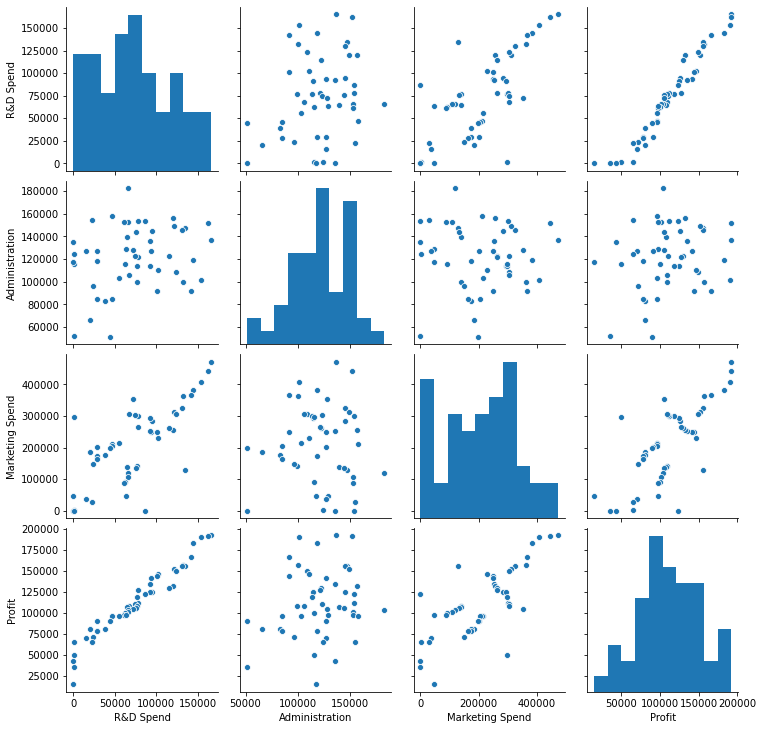

In [10]:
sns.pairplot(strtup[['R&D Spend', 'Administration', 'Marketing Spend', 'Profit']])
plt.show()

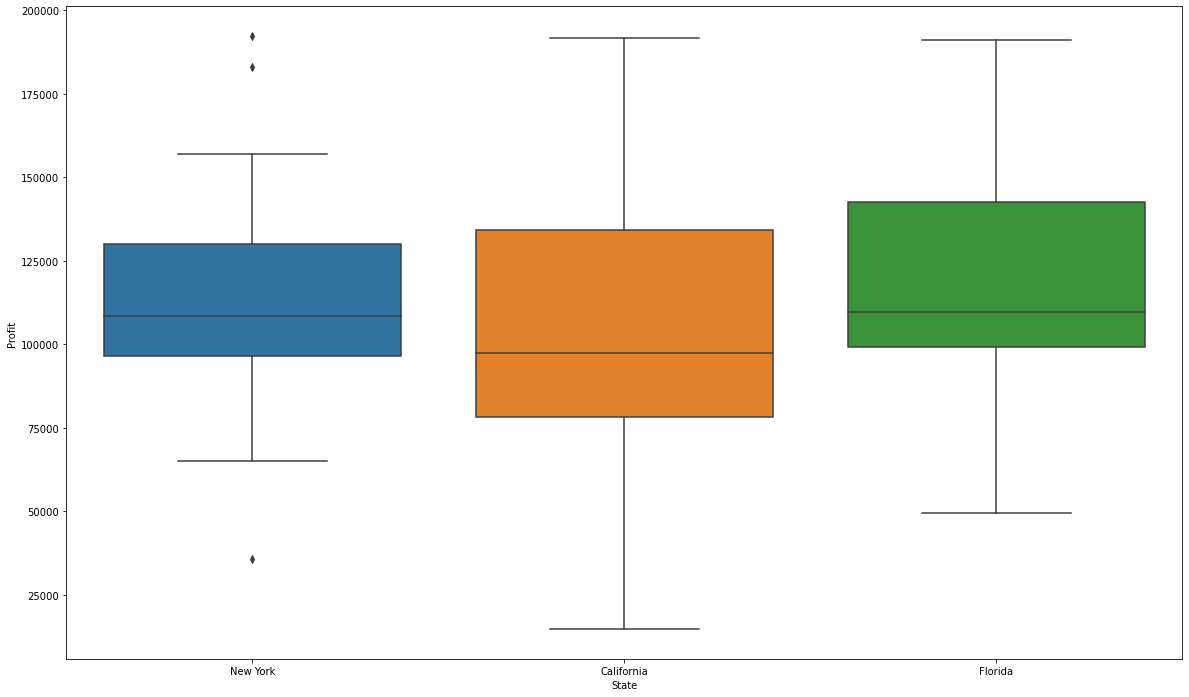

In [11]:
plt.figure(figsize=(20, 12))
#plt.subplot(2,3,1)
sns.boxplot(x = 'State', y = 'Profit', data = strtup)
plt.subplot()


In [12]:
state=pd.get_dummies(strtup['State'], drop_first = True)

In [13]:
state.head()

,Florida,New York
0,0,1
1,0,0
2,1,0
3,0,1
4,1,0


In [14]:
strtup = pd.concat([strtup, state], axis = 1)

In [15]:
strtup.head()

,R&D Spend,Administration,Marketing Spend,State,Profit,Florida,New York
0,165349.20,136897.80,471784.10,New York,192261.83,0,1
1,162597.70,151377.59,443898.53,California,191792.06,0,0
2,153441.51,101145.55,407934.54,Florida,191050.39,1,0
3,144372.41,118671.85,383199.62,New York,182901.99,0,1
4,142107.34,91391.77,366168.42,Florida,166187.94,1,0


In [16]:
strtup.drop(['State'], axis = 1, inplace = True)

In [17]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(strtup, train_size = 0.7, test_size = 0.3, random_state = 100)

# splitting the data to standard 70% trainset and 30% test set

In [18]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['R&D Spend', 'Administration', 'Marketing Spend', 'Profit']

# scaler fit & transform both are done over the train set. 
# specifically the fit is used on test and that is used as fitting standard so as to keep  us from overfit issues
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.head()

,R&D Spend,Administration,Marketing Spend,Profit,Florida,New York
25,0.397698,0.828781,0.310798,0.459464,0,0
26,0.463284,0.872035,0.301984,0.448762,1,0
35,0.282993,0.314337,0.462983,0.389486,0,1
17,0.582156,0.880923,0.636574,0.574544,0,1
7,0.801353,0.885193,0.729619,0.769153,1,0


In [19]:
df_train.describe()

,R&D Spend,Administration,Marketing Spend,Profit,Florida,New York
count,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000
mean,0.479871,0.689748,0.489092,0.508198,0.342857,0.342857
std,0.265304,0.244887,0.273648,0.246458,0.481594,0.481594
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.330763,0.546419,0.306391,0.393271,0.000000,0.000000
50%,0.463284,0.713324,0.562830,0.467981,0.000000,0.000000
75%,0.665559,0.900242,0.684940,0.655098,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


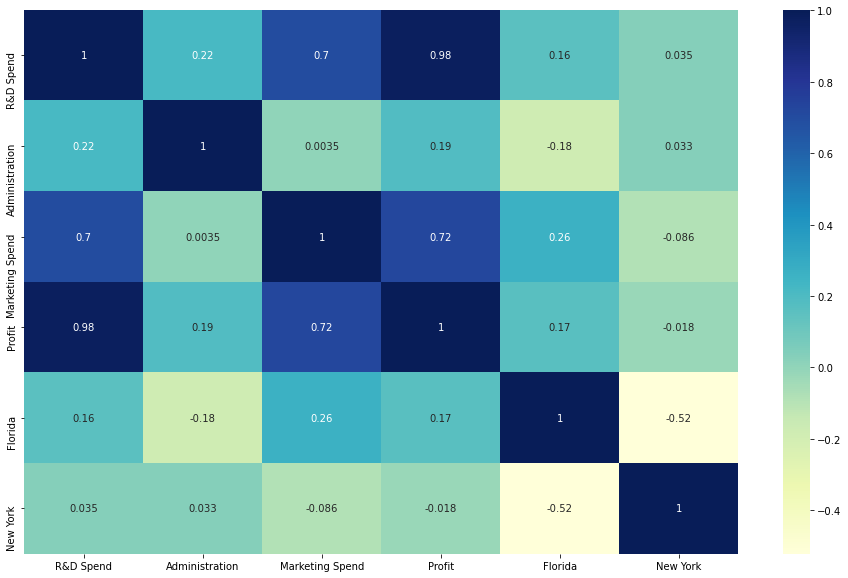

In [20]:
plt.figure(figsize = (16, 10))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

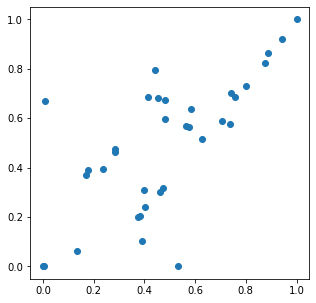

In [21]:
plt.figure(figsize=[5,5])
plt.scatter(df_train['R&D Spend'], df_train['Marketing Spend'])
plt.show()

In [22]:
df_train.drop(['Marketing Spend'], axis = 1, inplace = True)

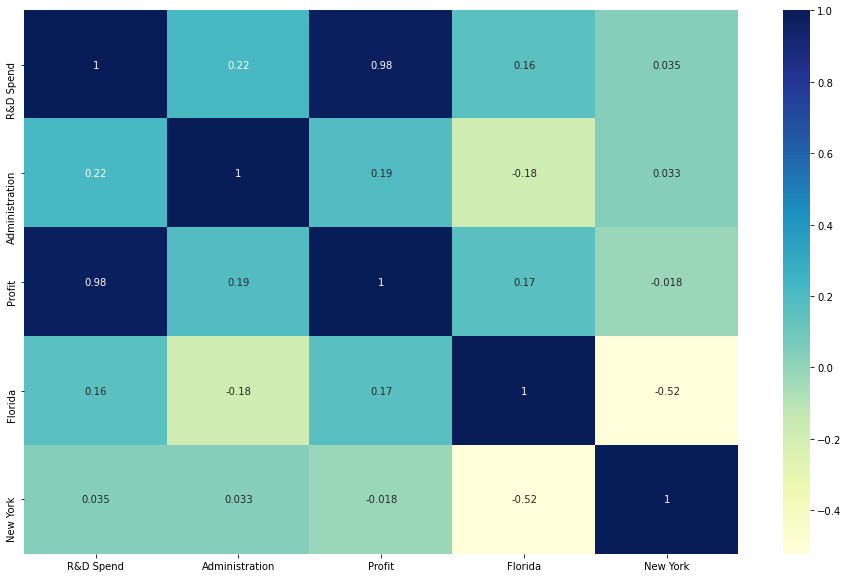

In [23]:
plt.figure(figsize = (16, 10))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [24]:
y_train = df_train.pop('Profit')
X_train = df_train

In [25]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [26]:
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 4)             # running RFE with final 10 variable selection in output 
rfe = rfe.fit(X_train, y_train)

In [27]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('R&D Spend', True, 1),
 ('Administration', True, 1),
 ('Florida', True, 1),
 ('New York', True, 1)]

In [28]:
col = X_train.columns[rfe.support_]
col

Index(['R&D Spend', 'Administration', 'Florida', 'New York'], dtype='object')

In [29]:
X_train.columns[~rfe.support_]

Index([], dtype='object')

In [30]:
X_train_rfe = X_train[col]

In [31]:
import statsmodels.api as sm  
X_train_rfe2 = sm.add_constant(X_train_rfe)

In [32]:
lm = sm.OLS(y_train,X_train_rfe2).fit()   # Running the linear model

In [33]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                 Profit   R-squared:                       0.964
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     200.9
Date:                Sun, 27 Feb 2022   Prob (F-statistic):           3.41e-21
Time:                        14:01:50   Log-Likelihood:                 58.042
No. Observations:                  35   AIC:                            -106.1
Df Residuals:                      30   BIC:                            -98.31
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1031      0.031      3.

In [34]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [35]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,R&D Spend,4.71
1,Administration,4.26
2,Florida,1.89
3,New York,1.87


In [36]:
y_train_cnt = lm.predict(X_train_rfe2)

Text(0.5, 0, 'Errors')

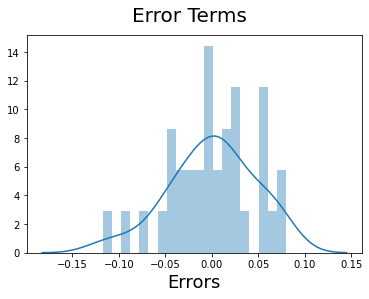

In [37]:
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

In [38]:
num_vars = ['R&D Spend', 'Administration', 'Marketing Spend', 'Profit']

df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test.head()

,R&D Spend,Administration,Marketing Spend,Profit,Florida,New York
6,0.827905,0.900944,0.287716,0.771523,0,0
36,0.176286,0.710831,0.453092,0.352519,1,0
37,0.271037,-0.004342,0.443861,0.347657,0,0
28,0.406227,1.235502,0.266160,0.433061,1,0
43,0.095363,0.713908,0.080050,0.218331,0,1


In [39]:
df_test.describe()

,R&D Spend,Administration,Marketing Spend,Profit,Florida,New York
count,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000
mean,0.391630,0.580330,0.443421,0.444144,0.266667,0.333333
std,0.319625,0.300223,0.286725,0.287577,0.457738,0.487950
min,0.000000,-0.004342,0.004289,-0.134462,0.000000,0.000000
25%,0.134905,0.436609,0.276938,0.260637,0.000000,0.000000
50%,0.341296,0.589261,0.443861,0.391404,0.000000,0.000000
75%,0.591709,0.712370,0.613501,0.631505,0.500000,1.000000
max,1.016922,1.235502,1.062820,1.003009,1.000000,1.000000


In [40]:
y_test = df_test.pop('Profit')
X_test = df_test

In [41]:
X_test_m1 = sm.add_constant(X_test)

In [42]:
X_test_m1 = X_test_m1.drop(['Administration'], axis = 1)

In [43]:
y_pred_m1 = lm.predict(X_test_m1)

In [44]:
from sklearn.metrics import r2_score

In [45]:
r2_score(y_true = y_test, y_pred = y_pred_m1)

0.9031375168050517

Text(0, 0.5, 'y_pred')

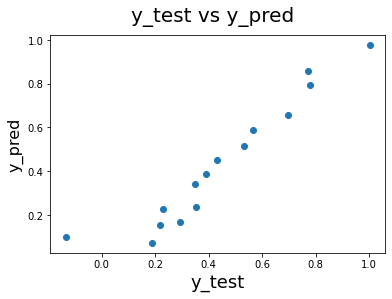

In [46]:
fig = plt.figure()
plt.scatter(y_test, y_pred_m1)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)      

In [47]:
lm.params

const             0.103145
R&D Spend         0.923334
Administration   -0.028505
Florida          -0.017553
New York         -0.036017
dtype: float64